<img src="Boosting.png" width="350" height="300" align="right"/>

# Gradient Boosting: Trees

Author: Christoph Güttner


**Abstract:** The Gradient Boosting Algorithm is used here to  
predict 5 Datasets. Further, a short theoretical overview is  
provided before.  
  
Gradient boosting describes a gradient descent in the functional space.  
In contrast to Bagging, Boosting is a  sequential algorithm, that  
has the goal of stepwisely improving the accuracy of the predicion.  
The ensemble consists of m classifier h, whereby each calssifier h_{i}  
fits the so-called *pseudo-residuals* of the n training points that  
were left by i-1 classifier before. If the $i^{th}$ cannot impove the  
accuracy anymore the algorithm stops (early stopping).  
Here, the base classifier h are decision trees with max_depth=2.  

## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Imports](#Imports)
    * [Functions](#Functions)

* [Theory Overview](#Time_Series_Data)
    * [Bias Variance Decomposition](#Bias_Variance_Decomposition)
    * [Bootstrapping Aggregation](#Bootstrapping_Aggregation)
* [Real Data](#Real_Data)
    * [Diamonds](#Diamonds)
    * [Planets](#Planets)
    * [Titanic](#Titanic)
    * [Wine](#Wine)
    * [Digits](#Digits)


In [173]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine, load_digits




In [174]:

def load_data(data, target_col):
    if isinstance(data, pd.DataFrame): 
        X = data.drop(target_col, axis = 1)
        y = data[target_col].to_numpy()
    elif isinstance(data.data, np.ndarray):
        X = data.data
        y = data.target
    else:
        return 'Type Error'
    return X,y


def make_dictionary(dataset):
    features = {dataset.feature_names[i] : dataset.data[:,i] for i in range(len(dataset.feature_names))}
    target = {'target' : dataset.target}
    return features, target

def get_dataframe(features, target):
    df = pd.DataFrame(features)
    df = df.assign(**target)
    return df

def encoder(X):
    if isinstance(X, pd.DataFrame):
        encoder = LabelEncoder()
        to_encode = X.select_dtypes(exclude = 'float').columns.values
        X[list(to_encode)] = X[to_encode].apply(encoder.fit_transform)
    else:
        return X
    return X

def scalar(X):
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    return X

def split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    return X_train, X_test, y_train, y_test

def gradboost_classificationTree(X_train, X_test, y_train, y_test):
    num_esti = list(range(100))
    Score_train=[]
    Score_test=[]
    for i in range(1,len(num_esti)):
        classifier = GradientBoostingClassifier(n_estimators=num_esti[i], learning_rate=1.0,  max_depth=2, random_state=0)
        classifier.fit(X_train,y_train)
        y_pred= classifier.predict(X_test)
        score_train = classifier.score(X_train,y_train)
        score_test = classifier.score(X_test,y_test)
        Score_train.append(score_train)
        Score_test.append(score_test)
    return Score_train, Score_test

def gradboost_regressionTree(X_train, X_test, y_train, y_test):
    num_esti = list(range(100))
    Score_train=[]
    Score_test=[]
    for i in range(1,len(num_esti)):
        classifier = GradientBoostingRegressor(loss='ls', n_estimators=num_esti[i], max_depth=2, learning_rate=.1) #‘ls’, ‘lad’, ‘huber’, ‘quantile’
        classifier.fit(X_train,y_train)
        y_pred= classifier.predict(X_test)
        score_train = classifier.score(X_train,y_train)
        score_test = classifier.score(X_test,y_test)
        Score_train.append(score_train)
        Score_test.append(score_test)
    return Score_train, Score_test


def plot_scores(Score_train, Score_test):
    plt.figure(figsize=(15,5))
    plt.plot(Score_train, label='train')
    plt.plot(Score_test, label='test')
    plt.title(title, fontdict = {'fontsize' : 25})
    plt.xlabel('N_Estimator',fontdict = {'fontsize' : 15})
    plt.ylabel('Score', fontdict = {'fontsize' : 15})
    plt.ylim(0,1.2)
    plt.legend()

## Theory:  Gradient Boosting  

Can weak learners (H) be combined to generate a strong learner with low bias?   
Recall, the bias captures how far the predicted value h(x) is from the true  
value y(x).
    
  $$\bar{h}(\mathbf{x}) - \bar{y}(\mathbf{x})$$

The classifier H conists of a sum of weak classifiers h and a constant learning  
rate $\alpha$ for each of the m steps. 

$${\displaystyle H_{(m)}(x_{i})=\alpha _{1}h_{1}(x_{i})+\cdots +\alpha _{m}h_{m}(x_{i}) = H_{{(m-1)}}(x_{i})+\alpha _{m}h_{m}(x_{i})}$$

**Gradient descent in functional space**

In general, the loss function L can be linear approximated by the Taylor algorithm  
(Taylorapproximation)

\begin{equation}
L(H+\alpha h) \approx L(H) + \alpha <\nabla L(H),h>
\end{equation}

In each round the classfier h is to find, that fullfills the following equation.

$$h = \textrm{argmin}_{h \in \mathbb{H}} \sum_{i = 1}^{n} r_i  h(\mathbf{x}_i)$$  
where $r_i = \frac{\partial L}{\partial H(\mathbf{x}_i)}$


**Assuming Squard Error Function**  
In the following we assume a Squared Error Loss function L, where every other loss    
function is possible, too.  

$$L_(H)=\frac{1}{2}\sum_{i=1}^n (H(\mathbf{x}_i)-y_i)^2$$  
  
In the next step we compute so-called pseudo-residuals r_i for step i:  
  

$${\displaystyle r_{i}=-\left[{\frac {\partial L(y_{i},H(x_{i}))}{\partial H(x_{i})}}\right]_{H(x)=H_{m-1}(x)}\quad=y_i-H(x_{i})}$$
  
After having calculated the residuals for step i, we fit the next base learner  
$h_{i+1}$ with the resiuals.  
  


$$h = \textrm{argmin}_{h \in \mathbb{H}}-\sum_{i = 1}^{n}(h(\mathbf{x}_i)-r_i)^2$$
  
 

In the last step, we update the model to get the final calssifier after m steps:  
$$H_{m}(x)=H_{m-1}(x)+\alpha_{m}h_{m}(x)$$
  
 






source: http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/


## Load Datasets

In [158]:
diamonds = sns.load_dataset('diamonds')
planets = sns.load_dataset('planets')
titanic= sns.load_dataset('titanic')
wine = load_wine()
digits = load_digits()


## Diamonds

In [159]:
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


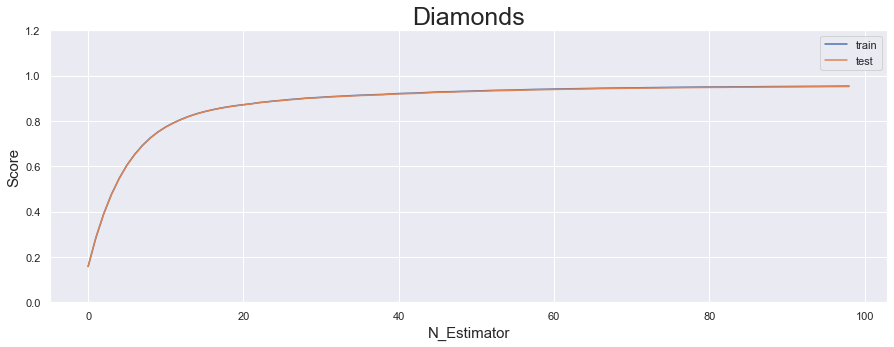

In [176]:
title='Diamonds'
X,y = load_data(diamonds,'price')
X_en = encoder(X)
X_sc = scalar(X_en)
# X_sc = X_sc[0:3000]
# y = y[0:3000]
X_train, X_test, y_train, y_test = split(X_sc,y)
Score_train, Score_test = gradboost_regressionTree(X_train, X_test, y_train, y_test)
plot_scores(Score_train, Score_test)

## Planets

In [163]:
planets = planets.dropna()
planets.tail()

,method,number,orbital_period,mass,distance,year
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013
784,Radial Velocity,3,580.00000,0.947,135.00,2012


In [164]:
planets.method.unique()

array(['Radial Velocity', 'Transit'], dtype=object)

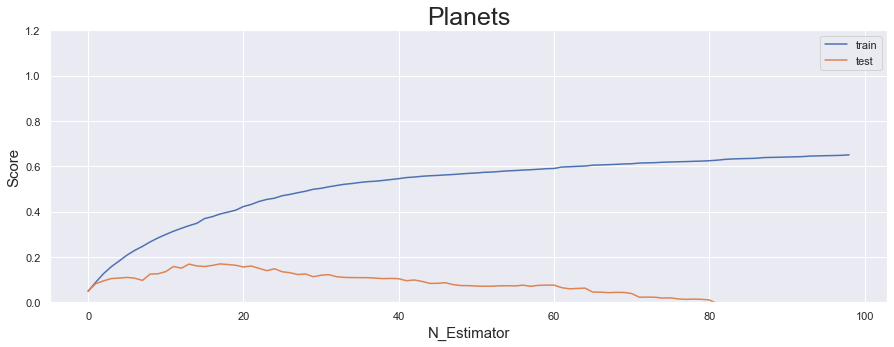

In [175]:
title='Planets'
X,y = load_data(planets,'distance')
X_en = encoder(X)
X_sc = scalar(X_en)
X_train, X_test, y_train, y_test = split(X_sc,y)
#Score_train, Score_test = gradboost_classificationTree(X_train, X_test, y_train, y_test)
Score_train, Score_test = gradboost_regressionTree(X_train, X_test, y_train, y_test)
plot_scores(Score_train, Score_test)

## Titanic

In [166]:
titanic = titanic.drop('deck',axis=1)
titanic = titanic.dropna()
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.000,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,Queenstown,no,True


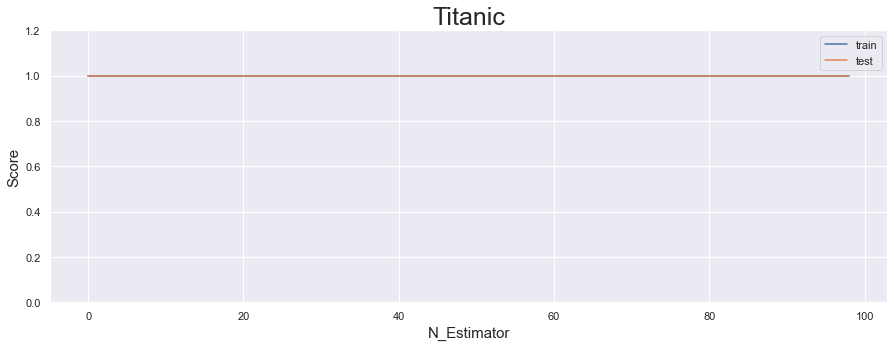

In [167]:

title='Titanic'
X,y = load_data(titanic,'survived')
X_en = encoder(X)
X_sc = scalar(X_en)
X_train, X_test, y_train, y_test = split(X_sc,y)
Score_train, Score_test = gradboost_classificationTree(X_train, X_test, y_train, y_test)
plot_scores(Score_train, Score_test)

## Wine

In [168]:
features, target =  make_dictionary(wine)
df_wine = get_dataframe(features, target)
df_wine.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


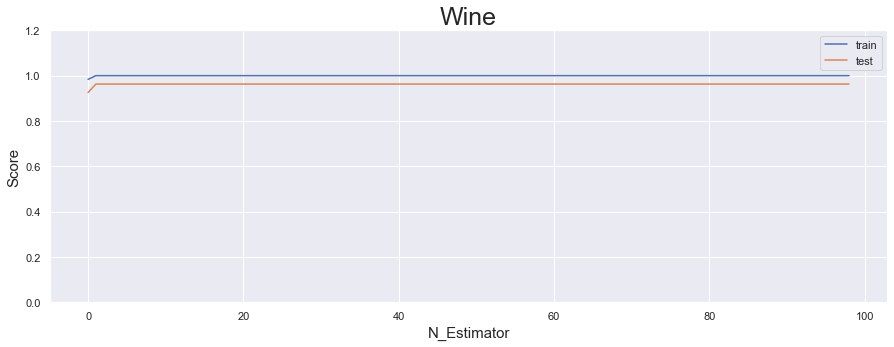

In [169]:
title='Wine'
X,y = load_data(wine,'price')
X_en = encoder(X)
X_sc = scalar(X_en)
X_train, X_test, y_train, y_test = split(X_sc,y)

Score_train, Score_test = gradboost_classificationTree(X_train, X_test, y_train, y_test)
plot_scores(Score_train, Score_test)

## Digits

In [170]:
features, target =  make_dictionary(digits)
df_wine = get_dataframe(features, target)
df_wine.tail()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


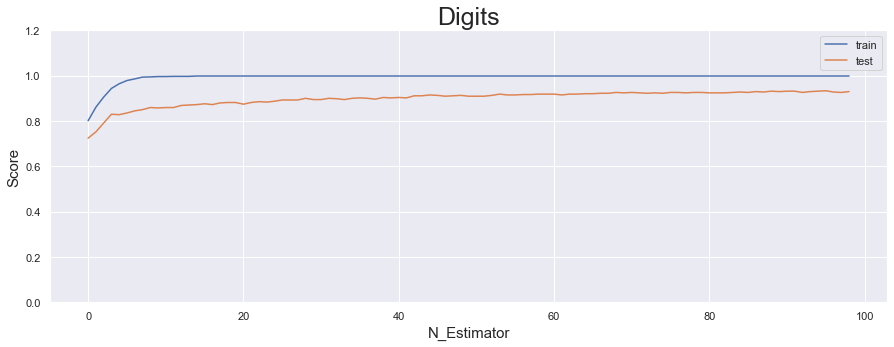

In [171]:
title='Digits'
X,y = load_data(digits,'non')
X_en = encoder(X)
X_sc = scalar(X_en)
X_train, X_test, y_train, y_test = split(X_sc,y)

Score_train, Score_test = gradboost_classificationTree(X_train, X_test, y_train, y_test)
plot_scores(Score_train, Score_test)